In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('corona_tested_individuals_ver_0083.english.csv')
df.head()

C:\Users\shrey\AppData\Local\Temp\ipykernel_22356\3431319962.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('corona_tested_individuals_ver_0083.english.csv')


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [3]:
df.shape


(2742596, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [5]:
df = df.drop('test_date',axis=1)

In [6]:
df.nunique()

cough                  2
fever                  2
sore_throat            2
shortness_of_breath    2
head_ache              2
corona_result          3
age_60_and_above       2
gender                 2
test_indication        3
dtype: int64

In [7]:
df['corona_result'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [8]:
df['test_indication'].unique()

array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object)

In [9]:
df.isnull().sum().sort_values()

cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
test_indication             0
gender                  92886
age_60_and_above       547644
dtype: int64

In [10]:
df[df['gender'].isnull()]

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
6797,0,0,0,0,0,negative,NaN,NaN,Other
6798,0,0,0,0,0,negative,NaN,NaN,Other
6933,0,0,0,0,0,negative,NaN,NaN,Other
7309,0,0,0,0,0,positive,NaN,NaN,Other
7310,0,0,0,0,0,positive,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...
2741693,1,0,0,0,0,negative,NaN,NaN,Abroad
2741867,1,0,0,0,0,negative,NaN,NaN,Abroad
2741921,0,0,0,0,0,negative,NaN,NaN,Other
2741945,1,0,0,0,0,negative,NaN,NaN,Other


In [11]:
df_drp = df[pd.isnull(df['gender']) & pd.notnull(df['age_60_and_above'])]
df_drp.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
8416,0,0,0,0,0,negative,No,NaN,Other
8557,0,0,0,0,0,negative,No,NaN,Other
11044,0,0,0,0,0,negative,No,NaN,Other
11045,0,0,0,0,0,negative,No,NaN,Other
12523,0,0,0,0,0,negative,No,NaN,Other


In [12]:
df.drop(df_drp.index,inplace=True)

<AxesSubplot: xlabel='gender', ylabel='count'>

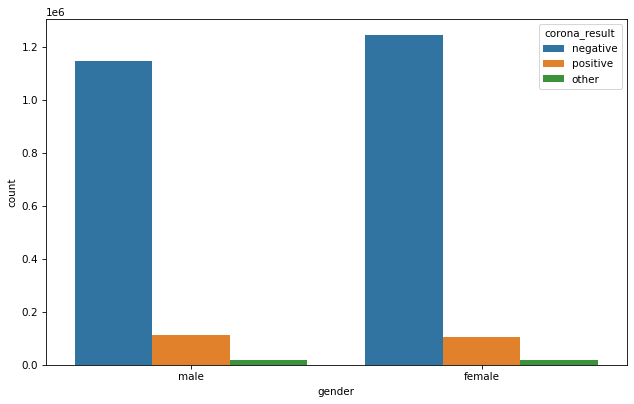

In [13]:
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(data=df,x='gender',hue='corona_result')

<AxesSubplot: xlabel='age_60_and_above', ylabel='count'>

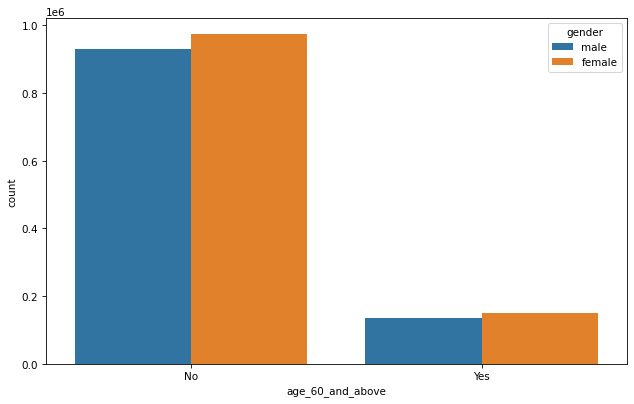

In [14]:
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(data=df,x='age_60_and_above',hue='gender')

In [15]:
df[pd.isnull(df['age_60_and_above'])]

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
932,0,0,0,0,0,negative,NaN,male,Other
1023,0,0,0,0,0,negative,NaN,female,Other
1039,0,0,0,0,0,negative,NaN,female,Other
1107,0,0,0,0,0,negative,NaN,male,Other
1145,0,0,0,0,0,negative,NaN,female,Other
...,...,...,...,...,...,...,...,...,...
2742591,0,0,0,0,0,negative,NaN,female,Other
2742592,0,0,0,0,0,negative,NaN,female,Other
2742593,0,0,0,0,0,other,NaN,male,Other
2742594,0,0,0,0,0,negative,NaN,female,Other


In [16]:
df['age_60_and_above']=df['age_60_and_above'].fillna('No')


In [17]:
df.isnull().sum().sort_values()

cough                      0
fever                      0
sore_throat                0
shortness_of_breath        0
head_ache                  0
corona_result              0
age_60_and_above           0
test_indication            0
gender                 84161
dtype: int64

In [18]:
df['gender'].value_counts()

female    1371444
male      1278266
Name: gender, dtype: int64

In [19]:
from random import choice
mask=df['gender'].isna()
df.loc[mask,['gender']]=df.loc[mask,['gender']].applymap(lambda _: choice(['male','female']))

In [20]:
df['gender']=pd.get_dummies(df['gender'],drop_first=True)

In [22]:
d_c=pd.get_dummies(df['corona_result'],drop_first=True)
d_c

,other,positive
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2742591,0,0
2742592,0,0
2742593,1,0
2742594,0,0


In [23]:
df = df.drop('corona_result',axis=1)

In [24]:
df = pd.concat([df,d_c],axis=1)


In [26]:
df.drop('other',axis=1,inplace=True)

In [27]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,positive
0,0,0,0,0,0,No,1,Other,0
1,0,1,0,0,0,No,1,Other,0
2,0,0,0,0,0,Yes,0,Other,0
3,0,0,0,0,0,No,1,Other,0
4,0,1,0,0,0,No,1,Contact with confirmed,0


In [29]:
df['test_indication'].unique()

array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object)

In [30]:
dictionary={
    "age_60_and_above":{
      "No":0,
      "Yes":1
      
    },
    "test_indication":{
      "Abroad":0,
      "Contact with confirmed":1,
      "Other":2
    }
}

In [31]:
df = df.replace(dictionary)

In [32]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,positive
0,0,0,0,0,0,0,1,2,0
1,0,1,0,0,0,0,1,2,0
2,0,0,0,0,0,1,0,2,0
3,0,0,0,0,0,0,1,2,0
4,0,1,0,0,0,0,1,1,0


In [33]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop('positive',axis=1)
y=df['positive']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.svm import SVC
svc=SVC()

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier(n_estimators=20,max_features='auto',random_state=101)

In [40]:
model.fit(X_train,y_train)

c:\Users\shrey\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=20, random_state=101)

In [41]:
preds = model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [43]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    754089
           1       0.60      0.56      0.58     66073

    accuracy                           0.93    820162
   macro avg       0.78      0.76      0.77    820162
weighted avg       0.93      0.93      0.93    820162



In [44]:
accuracy_score(y_test,preds)

0.9347214330827325

c:\Users\shrey\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


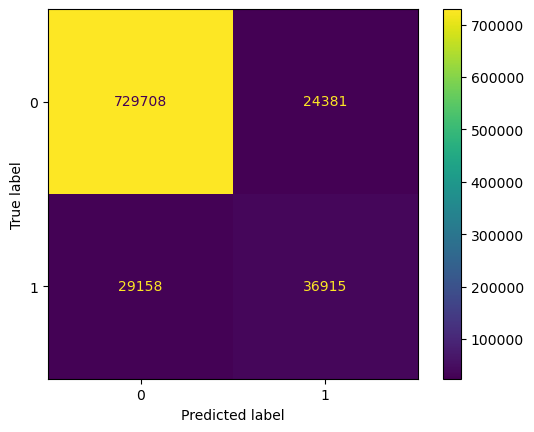

In [45]:
plot_confusion_matrix(model,X_test,y_test)

In [47]:
import pickle
pickle.dump(model,open("covid.pkl","wb"))